Le "batch size" dans l'entraînement des réseaux neuronaux fait référence au nombre d'exemples d'entraînement utilisés dans une itération de l'algorithme d'optimisation (comme la descente de gradient) avant la mise à jour des paramètres du modèle. Il a un impact à la fois sur l'efficacité computationnelle de l'entraînement et sur la qualité du modèle appris.

Voici quelques impacts clés du "batch size" :

1. **Efficacité Computationnelle :** Les "batch sizes" plus grands entraînent généralement des temps d'entraînement plus rapides car plus d'exemples sont traités simultanément, exploitant ainsi les capacités de traitement parallèle du matériel moderne (comme les GPUs/TPUs). Cependant, des "batch sizes" plus importants peuvent nécessiter davantage de mémoire.

2. **Généralisation et Stabilité :** Des "batch sizes" plus petits conduisent souvent à une meilleure généralisation. Ils fournissent une estimation du gradient plus bruitée à chaque itération en raison de la randomisation introduite par moins d'exemples, ce qui peut aider le modèle à éviter de rester bloqué dans des minima locaux. Les "batch sizes" plus petits peuvent également introduire plus de diversité dans les mises à jour, aidant le modèle à explorer l'espace des paramètres.

3. **Convergence et Précision :** Des "batch sizes" plus grands convergent souvent plus rapidement vers une solution optimale, mais peuvent aboutir à un minimum plus plat en raison d'une estimation du gradient plus déterministe. Des "batch sizes" plus petits peuvent trouver de meilleures solutions, mais pourraient mettre plus de temps à converger ou être plus sujets à rester coincés dans des points de selle.

Choisir le bon "batch size" est souvent empirique et dépend de divers facteurs tels que :

- **Taille de l'ensemble de données :** Pour de plus grands ensembles de données, des "batch sizes" plus importants peuvent être utilisés efficacement.
- **Complexité du Modèle :** Les modèles plus complexes pourraient bénéficier de "batch sizes" plus importants pour utiliser efficacement le traitement parallèle.
- **Ressources Informatiques :** La mémoire disponible et la puissance de calcul influencent le choix. Des "batch sizes" plus petits pourraient être nécessaires si la mémoire est limitée.
- **Taux d'apprentissage :** Des "batch sizes" plus petits nécessitent souvent des taux d'apprentissage plus petits pour éviter l'instabilité ou la divergence.
- **Performance du Modèle Souhaitée :** Si une meilleure généralisation est requise, des "batch sizes" plus petits pourraient être préférés malgré des temps d'entraînement plus longs.

Typiquement, un bon point de départ est d'expérimenter avec des "batch sizes" comme 32, 64, 128, etc., et de surveiller les performances d'entraînement/validation pour déterminer le "batch size" le plus adapté à votre tâche spécifique et à votre architecture de modèle. Les techniques de validation croisée ou de recherche par grille peuvent aider à trouver le "batch size" optimal de manière plus systématique.

In [ ]:
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [ ]:

device = "cuda" if torch.cuda.is_available() else "cpu"

data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
# Define hyperparameters
input_size = 28 * 28  # Fashion MNIST image size
hidden_size = 1000
num_classes = 10



In [ ]:
# Define hyperparameters
learning_rate = 0.001
num_epochs = 10

criterion = nn.CrossEntropyLoss()


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 12013168.68it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201229.34it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3762905.59it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5034338.31it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Initialisation des listes pour stocker les valeurs d'exactitude (accuracy)
valeurs_exactitude_train =  {u:[] for u in range(2)}
valeurs_exactitude_val = {u:[] for u in range(2)}

In [ ]:
for train_idx,bs in enumerate([32,10000]):

  # Define the transformation to apply to the dataset


  print('----------Batch Size %d----------'%(bs))


  trainloader = torch.utils.data.DataLoader(trainset, batch_size=bs, shuffle=True)
  testloader = torch.utils.data.DataLoader(testset, batch_size=bs, shuffle=False)




  # Initialize the model, loss function, and optimizer
  model = MLP(input_size, hidden_size, num_classes).cuda()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Entraînement du modèle
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      correct_train = 0
      total_train = 0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels =inputs.cuda().float(), labels.cuda()
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      exactitude_train = 100 * correct_train / total_train
      valeurs_exactitude_train[train_idx].append(exactitude_train)

      # Validation
      model.eval()
      correct_val = 0
      total_val = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              images, labels =images.cuda().float(), labels.cuda()
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      exactitude_val = 100 * correct_val / total_val
      valeurs_exactitude_val[train_idx].append(exactitude_val)

      print(f"Époque [{epoch+1}/{num_epochs}] - Perte : {running_loss / len(trainloader):.4f} - Exactitude Entraînement : {exactitude_train:.2f}% - Exactitude Validation : {exactitude_val:.2f}%")




----------Batch Size 32----------
Époque [1/10] - Perte : 0.4737 - Exactitude Entraînement : 82.94% - Exactitude Validation : 85.02%
Époque [2/10] - Perte : 0.3543 - Exactitude Entraînement : 87.05% - Exactitude Validation : 86.85%
Époque [3/10] - Perte : 0.3202 - Exactitude Entraînement : 88.20% - Exactitude Validation : 86.72%
Époque [4/10] - Perte : 0.2972 - Exactitude Entraînement : 88.99% - Exactitude Validation : 87.61%
Époque [5/10] - Perte : 0.2790 - Exactitude Entraînement : 89.61% - Exactitude Validation : 87.95%
Époque [6/10] - Perte : 0.2619 - Exactitude Entraînement : 90.29% - Exactitude Validation : 87.90%
Époque [7/10] - Perte : 0.2510 - Exactitude Entraînement : 90.63% - Exactitude Validation : 88.13%
Époque [8/10] - Perte : 0.2384 - Exactitude Entraînement : 91.11% - Exactitude Validation : 88.71%
Époque [9/10] - Perte : 0.2280 - Exactitude Entraînement : 91.42% - Exactitude Validation : 87.94%
Époque [10/10] - Perte : 0.2204 - Exactitude Entraînement : 91.73% - Exacti

In [ ]:
it=N/32, it=N/N,   epoch*it

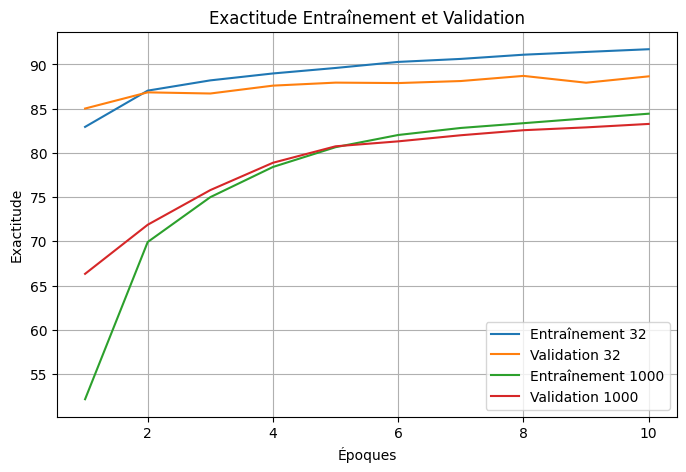

In [ ]:
plt.figure(figsize=(8, 5))
for idx_u,u in enumerate(['32','1000']):
  # Tracé de l'exactitude à chaque époque pour les ensembles d'entraînement et de validation

  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_train[idx_u], label='Entraînement '+u)
  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_val[idx_u], label='Validation '+u)
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.title('Exactitude Entraînement et Validation')
plt.legend()
plt.grid(True)
plt.show()